#CASO 4. MARZO

In [217]:
from datetime import timedelta
import elasticsearch
import elasticsearch
from elasticsearch import Elasticsearch
import certifi
import eland as ed
from datetime import datetime
import pandas as pd
import numpy as np

# Password for the 'elastic' user generated by Elasticsearch
ELASTIC_PASSWORD = "bQFTDSrYewfZFft46ObzKjAB"

# Found in the 'Manage Deployment' page
CLOUD_ID = "Despliegue_Pruebas_ML_Caixabank_TimeSeries_3:dXMtY2VudHJhbDEuZ2NwLmNsb3VkLmVzLmlvOjQ0MyQ5NTBhYmE4Y2IyMWI0MmYwYjc1Yzk2ZjU1ZTY5MzA0MyRiNTNmNGVlNzY0YmQ0MzM3OGQ0YTFkMDllODM5ZTMwOA=="

# Create the client instance
client = Elasticsearch(
    cloud_id=CLOUD_ID,
    basic_auth=("elastic", ELASTIC_PASSWORD)
)

# Successful response!
client.info()
# {'name': 'instance-0000000000', 'cluster_name': ...}

es=client
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-caso4_accuracy")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_clean = df_clean.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_score = df_score.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()
df_final["anomaly_score"] = 0
df_final_final = pd.merge(df_final, df_score, on='timestamp', how='left')
df_final_final = df_final_final.replace(np.nan, 0)
df_final_final = df_final_final.drop(columns=['anomaly_score_x'])
df_final_final
df_final_final = df_final_final.drop_duplicates()
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 1)
# Modificar fechas y nombres para caso
df_final_marzo_caso4 = df_final_final.loc['2022-03-01 00:00:00':'2022-03-27 01:50:00']
df_final_marzo_caso4["anomalia_detect"] = df_final_marzo_caso4.anomaly_score_y > 0.0
df_final_marzo_caso4
df_final_marzo_caso4.to_csv("caso4_anomalias_marzo.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [218]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

def root_mean_squared_error(actual, predictions):
    return np.sqrt(mean_squared_error(actual, predictions))

In [219]:
df_anom_real = pd.read_csv("/content/caso4_marzo.csv", index_col="ds")

In [220]:
df_anom_real = df_anom_real.loc['2022-03-01 00:00:00':'2022-03-27 01:50:00']
df_anom_real

,Unnamed: 0,y,yhat1,upper,lower,anomalía,y_original,anomalia_real
ds,,,,,,,,
2022-03-01 00:00:00,0,377.644919,NaN,NaN,NaN,False,302.115936,True
2022-03-01 00:10:00,1,393.999576,NaN,NaN,NaN,False,315.199661,True
2022-03-01 00:20:00,2,410.318065,NaN,NaN,NaN,False,328.254452,True
2022-03-01 00:30:00,3,426.569321,NaN,NaN,NaN,False,341.255457,True
2022-03-01 00:40:00,4,442.722409,NaN,NaN,NaN,False,354.177927,True
...,...,...,...,...,...,...,...,...
2022-03-27 01:10:00,3751,393.116007,390.607178,410.917339,370.297017,False,393.116007,False
2022-03-27 01:20:00,3752,405.467127,403.189087,423.499248,382.878926,False,405.467127,False
2022-03-27 01:30:00,3753,417.617477,415.775116,436.085277,395.464955,False,417.617477,False


In [221]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_marzo_caso4.actual, df_final_marzo_caso4.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_marzo_caso4.actual, df_final_marzo_caso4.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_marzo_caso4.actual, df_final_marzo_caso4.model_median))

Mean Absolute Error (MAE): 26.828335
Mean Squared Error (MSE): 8388.488169
Root Mean Squared Error (RMSE): 91.588690


In [222]:
#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_marzo_caso4.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_marzo_caso4.anomalia_detect))

Número de anomalías reales:  432
Número de anomalías detectadas:  304
Accuracy: 0.906816


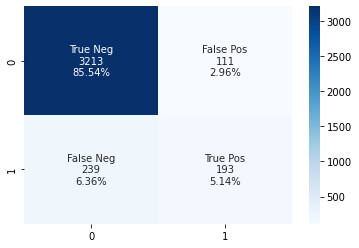

In [223]:
cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso4.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [224]:
print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_marzo_caso4.model_upper-df_final_marzo_caso4.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_marzo_caso4.model_upper-df_final_marzo_caso4.model_lower)/np.median(df_final_marzo_caso4.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_marzo_caso4.model_upper-df_final_marzo_caso4.model_lower))

Amplitud de Intervalo de Confianza: 19.513004
Porcentaje Intervalo de Confianza respecto y: 4.086387 
Cuánto de desvía el Intervalo de Confianza: 14.761540


#CASO 4. JULIO

In [228]:
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-caso4_accuracy")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_clean = df_clean.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_score = df_score.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()
df_final["anomaly_score"] = 0
df_final_final = pd.merge(df_final, df_score, on='timestamp', how='left')
df_final_final = df_final_final.replace(np.nan, 0)
df_final_final = df_final_final.drop(columns=['anomaly_score_x'])
df_final_final
df_final_final = df_final_final.drop_duplicates()
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 2)
# Modificar fechas y nombres para caso
df_final_julio_caso4 = df_final_final.loc['2022-07-01 00:00:00':'2022-07-31 23:50:00']
df_final_julio_caso4["anomalia_detect"] = df_final_julio_caso4.anomaly_score_y > 0.0
df_final_julio_caso4.to_csv("caso4_anomalias_julio.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [229]:
df_anom_real = pd.read_csv("/content/caso4_julio.csv", index_col="ds")

In [230]:
df_anom_real = df_anom_real.loc['2022-07-01 00:00:00':'2022-07-31 23:50:00']
df_anom_real

,Unnamed: 0,y,yhat1,upper,lower,anomalía,y_original,anomalia_real
ds,,,,,,,,
2022-07-01 00:00:00,0,383.113509,NaN,NaN,NaN,False,306.490807,True
2022-07-01 00:10:00,1,399.459539,NaN,NaN,NaN,False,319.567631,True
2022-07-01 00:20:00,2,415.759006,NaN,NaN,NaN,False,332.607205,True
2022-07-01 00:30:00,3,431.980884,NaN,NaN,NaN,False,345.584707,True
2022-07-01 00:40:00,4,448.094291,NaN,NaN,NaN,False,358.475433,True
...,...,...,...,...,...,...,...,...
2022-07-31 23:10:00,4459,242.509813,242.248047,254.260289,230.235805,False,242.509813,False
2022-07-31 23:20:00,4460,255.408067,255.478241,267.490483,243.465999,False,255.408067,False
2022-07-31 23:30:00,4461,268.391208,268.905334,280.917577,256.893092,False,268.391208,False


In [231]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_julio_caso4.actual, df_final_julio_caso4.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_julio_caso4.actual, df_final_julio_caso4.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_julio_caso4.actual, df_final_julio_caso4.model_median))

Mean Absolute Error (MAE): 58.163298
Mean Squared Error (MSE): 8077.745203
Root Mean Squared Error (RMSE): 89.876277


In [232]:
#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_julio_caso4.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_julio_caso4.anomalia_detect))

Número de anomalías reales:  432
Número de anomalías detectadas:  300
Accuracy: 0.941756


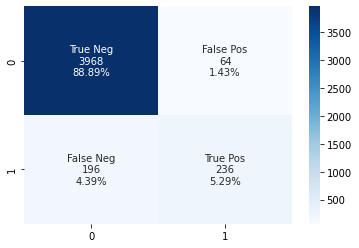

In [235]:
cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_julio_caso4.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [237]:
print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_julio_caso4.model_upper-df_final_julio_caso4.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_julio_caso4.model_upper-df_final_julio_caso4.model_lower)/np.median(df_final_julio_caso4.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_julio_caso4.model_upper-df_final_julio_caso4.model_lower))

Amplitud de Intervalo de Confianza: 248.873950
Porcentaje Intervalo de Confianza respecto y: 72.345322 
Cuánto de desvía el Intervalo de Confianza: 121.155744


#CASO 2. MARZO

In [238]:
from datetime import timedelta
import elasticsearch
import elasticsearch
from elasticsearch import Elasticsearch
import certifi
import eland as ed
from datetime import datetime
import pandas as pd
import numpy as np

# Password for the 'elastic' user generated by Elasticsearch
ELASTIC_PASSWORD = "bQFTDSrYewfZFft46ObzKjAB"

# Found in the 'Manage Deployment' page
CLOUD_ID = "Despliegue_Pruebas_ML_Caixabank_TimeSeries_3:dXMtY2VudHJhbDEuZ2NwLmNsb3VkLmVzLmlvOjQ0MyQ5NTBhYmE4Y2IyMWI0MmYwYjc1Yzk2ZjU1ZTY5MzA0MyRiNTNmNGVlNzY0YmQ0MzM3OGQ0YTFkMDllODM5ZTMwOA=="

# Create the client instance
client = Elasticsearch(
    cloud_id=CLOUD_ID,
    basic_auth=("elastic", ELASTIC_PASSWORD)
)

# Successful response!
client.info()
# {'name': 'instance-0000000000', 'cluster_name': ...}

es=client
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_clean = df_clean.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_score = df_score.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()
df_final["anomaly_score"] = 0
df_final_final = pd.merge(df_final, df_score, on='timestamp', how='left')
df_final_final = df_final_final.replace(np.nan, 0)
df_final_final = df_final_final.drop(columns=['anomaly_score_x'])
df_final_final
df_final_final = df_final_final.drop_duplicates()
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 1)
# Modificar fechas y nombres para caso
df_final_marzo_caso2 = df_final_final.loc['2022-03-01 00:00:00':'2022-03-27 01:50:00']
df_final_marzo_caso2["anomalia_detect"] = df_final_marzo_caso2.anomaly_score_y > 0.0
df_final_marzo_caso2
df_final_marzo_caso2.to_csv("caso2_anomalias_marzo.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [239]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

def root_mean_squared_error(actual, predictions):
    return np.sqrt(mean_squared_error(actual, predictions))

In [240]:
df_anom_real = pd.read_csv("/content/caso2_marzo.csv", index_col="ds")

In [241]:
df_anom_real = df_anom_real.loc['2022-03-01 00:00:00':'2022-03-27 01:50:00']
df_anom_real

,Unnamed: 0,y,yhat1,upper,lower,anomalía,y_original,anomalia_real
ds,,,,,,,,
2022-03-01 00:00:00,0,302.115936,NaN,NaN,NaN,False,302.115936,False
2022-03-01 00:10:00,1,315.199661,NaN,NaN,NaN,False,315.199661,False
2022-03-01 00:20:00,2,328.254452,NaN,NaN,NaN,False,328.254452,False
2022-03-01 00:30:00,3,341.255457,NaN,NaN,NaN,False,341.255457,False
2022-03-01 00:40:00,4,354.177927,NaN,NaN,NaN,False,354.177927,False
...,...,...,...,...,...,...,...,...
2022-03-27 01:10:00,3751,393.116007,394.622498,413.008172,376.236823,False,393.116007,False
2022-03-27 01:20:00,3752,405.467127,407.260498,425.646172,388.874824,False,405.467127,False
2022-03-27 01:30:00,3753,417.617477,419.862976,438.248650,401.477302,False,417.617477,False


In [242]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_marzo_caso2.actual, df_final_marzo_caso2.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_marzo_caso2.actual, df_final_marzo_caso2.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_marzo_caso2.actual, df_final_marzo_caso2.model_median))

Mean Absolute Error (MAE): 20.023830
Mean Squared Error (MSE): 4690.602339
Root Mean Squared Error (RMSE): 68.487972


In [243]:
#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_marzo_caso2.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_marzo_caso2.anomalia_detect))

Número de anomalías reales:  432
Número de anomalías detectadas:  273
Accuracy: 0.947018


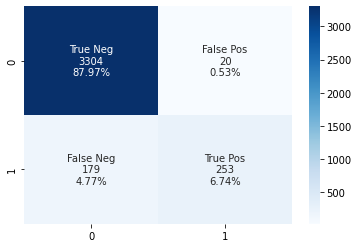

In [244]:
cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso2.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [245]:
print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower)/np.median(df_final_marzo_caso2.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower))

Amplitud de Intervalo de Confianza: 15.790722
Porcentaje Intervalo de Confianza respecto y: 3.580806 
Cuánto de desvía el Intervalo de Confianza: 8.920095


#CASO 2. JULIO

In [246]:
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_clean = df_clean.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_score = df_score.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()
df_final["anomaly_score"] = 0
df_final_final = pd.merge(df_final, df_score, on='timestamp', how='left')
df_final_final = df_final_final.replace(np.nan, 0)
df_final_final = df_final_final.drop(columns=['anomaly_score_x'])
df_final_final
df_final_final = df_final_final.drop_duplicates()
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 2)
# Modificar fechas y nombres para caso
df_final_julio_caso2 = df_final_final.loc['2022-07-01 00:00:00':'2022-07-31 23:50:00']
df_final_julio_caso2["anomalia_detect"] = df_final_julio_caso2.anomaly_score_y > 0.0
df_final_julio_caso2.to_csv("caso2_anomalias_julio.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [247]:
df_anom_real = pd.read_csv("/content/caso2_julio.csv", index_col="ds")

In [248]:
df_anom_real = df_anom_real.loc['2022-07-01 00:00:00':'2022-07-31 23:50:00']
df_anom_real

,Unnamed: 0,y,yhat1,upper,lower,anomalía,y_original,anomalia_real
ds,,,,,,,,
2022-07-01 00:00:00,17568,306.490807,NaN,NaN,NaN,False,306.490807,False
2022-07-01 00:10:00,17569,319.567631,NaN,NaN,NaN,False,319.567631,False
2022-07-01 00:20:00,17570,332.607205,NaN,NaN,NaN,False,332.607205,False
2022-07-01 00:30:00,17571,345.584707,NaN,NaN,NaN,False,345.584707,False
2022-07-01 00:40:00,17572,358.475433,NaN,NaN,NaN,False,358.475433,False
...,...,...,...,...,...,...,...,...
2022-07-31 23:10:00,22027,242.509813,238.903198,289.581240,188.225156,False,242.509813,False
2022-07-31 23:20:00,22028,255.408067,252.158203,302.836245,201.480161,False,255.408067,False
2022-07-31 23:30:00,22029,268.391208,265.616516,316.294558,214.938474,False,268.391208,False


In [249]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_julio_caso2.actual, df_final_julio_caso2.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_julio_caso2.actual, df_final_julio_caso2.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_julio_caso2.actual, df_final_julio_caso2.model_median))

Mean Absolute Error (MAE): 6.270491
Mean Squared Error (MSE): 133.240772
Root Mean Squared Error (RMSE): 11.542997


In [250]:
#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_julio_caso2.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_julio_caso2.anomalia_detect))

Número de anomalías reales:  576
Número de anomalías detectadas:  116
Accuracy: 0.883513


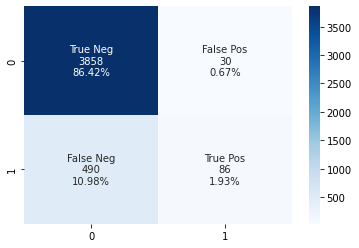

In [251]:
cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_julio_caso2.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [252]:
print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_julio_caso2.model_upper-df_final_julio_caso2.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_julio_caso2.model_upper-df_final_julio_caso2.model_lower)/np.median(df_final_julio_caso2.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_julio_caso2.model_upper-df_final_julio_caso2.model_lower))

Amplitud de Intervalo de Confianza: 40.380706
Porcentaje Intervalo de Confianza respecto y: 8.275252 
Cuánto de desvía el Intervalo de Confianza: 27.524686
